# Read evaluation and generate tables and bar plots
Goal: reproduce result summaries from the platform to integrate them in the paper.

In [1]:
from icdar24_maptext_analysis.loaders import check_for_missing_images, VALID_SUBSETS, VALID_TASKS, load_results, list_results 
from icdar24_maptext_analysis.paths import RELPATH_FILE_SUBMISSIONS_META
import pandas as pd

Quickly check we have all images from test sets available.

Note: generation of figures with images may be extracted to another notebook for clarity and to avoid the need to download image test sets for basic graph generation.

In [2]:
for subset in ("ign", ):  #VALID_SUBSETS:
    if len(missing_image := check_for_missing_images(subset)) > 0:
        print(f"Missing images in {subset}: {missing_image}")
        raise RuntimeError(f"Missing images in {subset}")

## Read metadata and filter content

Load the metadata file and set the submission id as index.

In [3]:
submissions_meta = pd.read_csv(RELPATH_FILE_SUBMISSIONS_META).set_index('ID')
submissions_meta

,Unnamed: 0,User,Date,Challenge,Task,Valid,Competition,Val. Set,Title,Filesize,Public,Eval.time,Results size
ID,,,,,,,,,,,,,
113398,93096,user_36250,2024-03-23 15:31:02,28,1,1,1,0,ds-lp,10318653,1,00:00:36,642.0
113413,93111,user_52424,2024-03-24 22:55:02,28,1,1,1,0,Test,278970683,1,00:00:44,321.0
113460,93158,user_36250,2024-03-26 06:24:55,28,4,1,1,0,DS-LP,14289896,1,00:26:18,467.0
113461,93159,user_36250,2024-03-26 06:26:21,28,3,1,1,0,DS-LP,14289896,1,00:25:14,459.0
113462,93160,user_36250,2024-03-26 06:27:32,28,2,1,1,0,DS-LP,14289896,1,00:03:56,792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114581,94279,user_51343,2024-05-06 04:57:11,28,2,1,1,0,MapText Detection-Linking Strong Pipeline,165918784,1,00:22:04,792.0
114582,94280,user_51343,2024-05-06 05:00:51,28,3,1,1,0,MapText Detection and Recognition Strong Pipeline,154636953,1,00:22:05,910.0
114583,94281,user_51343,2024-05-06 05:16:27,28,4,1,1,0,MapText Detection-Recognition-Linking Strong P...,165918784,1,00:22:04,939.0


Based on a manual check, it looks like the following submissions can be deleted from our analysis as duplicates:

- Task 1: 114256, 114281, 114292
- Task 2: 114294, 114580
- Task 3: 114289, 114291, 114322
- Task 4: 114295, 114583, 114584

We believe all of them have Rumsey entries, but not all of them may have IGN entries.

In [4]:
duplicate_submission_ids_manual = [
    114256, 114281, 114292,  # task 1
    114294, 114580,  # task 2
    114289, 114291, 114322,  # task 3
    114295, 114583, 114584]  # task 4

Collect the set of submission ids for which evaluation is available.

In [5]:
available_results = []
for task_id in VALID_TASKS:
    for subset in VALID_SUBSETS:
        available_results.extend(list_results(task_id, subset))
available_results = set(int(x) for x in available_results)
len(available_results)

35

In [6]:
valid_submission_ids = available_results - set(duplicate_submission_ids_manual)
len(valid_submission_ids)

24

In [7]:
submissions_meta_ignored = submissions_meta.loc[~submissions_meta.index.isin(valid_submission_ids)]
submissions_meta_valid = submissions_meta.loc[submissions_meta.index.isin(valid_submission_ids)]
print(f"Total submissions: {len(submissions_meta)}, valid: {len(valid_submission_ids)}, discarded: {len(submissions_meta_ignored)}")

Total submissions: 63, valid: 24, discarded: 39


### Valid submissions to be included in the report

In [8]:
submissions_meta_valid

,Unnamed: 0,User,Date,Challenge,Task,Valid,Competition,Val. Set,Title,Filesize,Public,Eval.time,Results size
ID,,,,,,,,,,,,,
113460,93158,user_36250,2024-03-26 06:24:55,28,4,1,1,0,DS-LP,14289896,1,00:26:18,467.0
113461,93159,user_36250,2024-03-26 06:26:21,28,3,1,1,0,DS-LP,14289896,1,00:25:14,459.0
113462,93160,user_36250,2024-03-26 06:27:32,28,2,1,1,0,DS-LP,14289896,1,00:03:56,792.0
113464,93162,user_36250,2024-03-26 06:33:14,28,1,1,1,0,DS-LP,14289896,1,00:05:55,792.0
113478,93176,user_9,2024-03-26 16:11:30,28,1,1,1,0,Baseline TESTR Checkpoint,34544956,1,00:22:08,792.0
113479,93177,user_9,2024-03-26 16:18:47,28,3,1,1,0,Baseline TESTR Checkpoint,34544956,1,00:22:09,917.0
113480,93178,user_9,2024-03-26 16:21:14,28,2,1,1,0,Baseline TESTR Checkpoint,34544956,1,00:29:47,796.0
113481,93179,user_9,2024-03-26 16:31:50,28,4,1,1,0,Baseline TESTR Checkpoint,34544956,1,00:22:48,944.0
114197,93895,user_51436,2024-04-27 16:10:36,28,1,1,1,0,ensem,96110879,1,00:22:08,791.0


### Filtered submissions which do not have an evaluation

In [9]:
submissions_meta_ignored

,Unnamed: 0,User,Date,Challenge,Task,Valid,Competition,Val. Set,Title,Filesize,Public,Eval.time,Results size
ID,,,,,,,,,,,,,
113398,93096,user_36250,2024-03-23 15:31:02,28,1,1,1,0,ds-lp,10318653,1,00:00:36,642.0
113413,93111,user_52424,2024-03-24 22:55:02,28,1,1,1,0,Test,278970683,1,00:00:44,321.0
113463,93161,user_36250,2024-03-26 06:28:50,28,1,1,1,0,DS-LP,14289896,1,00:01:09,792.0
113751,93449,user_51723,2024-04-12 13:57:38,28,1,1,1,0,Test title,13838542,1,00:00:37,642.0
113761,93459,user_51436,2024-04-13 07:26:49,28,1,1,1,0,DiT,82748940,1,00:01:27,778.0
113777,93475,user_51436,2024-04-14 20:18:40,28,1,1,1,0,MViT,74655170,1,00:01:22,791.0
113786,93484,user_50898,2024-04-15 10:04:39,28,3,1,1,0,submit_test_v1,2,1,00:00:21,364.0
113826,93524,user_32125,2024-04-17 10:24:37,28,1,1,1,0,MapTest,1415605,1,00:00:16,395.0
113853,93551,user_50898,2024-04-18 10:37:15,28,3,1,1,0,submit_test_v1,207656779,1,00:01:26,454.0


In [10]:
# count the number of submissions per user for each task
submissions_meta_valid.groupby(["User", "Task"]).size().unstack().fillna(0).astype(int)

Task,1,2,3,4
User,,,,
user_36250,1,1,1,1
user_43613,1,1,1,1
user_50898,1,0,1,0
user_51343,1,1,1,1
user_51436,3,0,0,0
user_53137,1,0,1,0
user_53700,1,0,0,0
user_9,1,1,1,1


In [11]:
submissions_meta_valid[submissions_meta_valid["User"] == "user_51436"]

,Unnamed: 0,User,Date,Challenge,Task,Valid,Competition,Val. Set,Title,Filesize,Public,Eval.time,Results size
ID,,,,,,,,,,,,,
114197,93895,user_51436,2024-04-27 16:10:36,28,1,1,1,0,ensem,96110879,1,00:22:08,791.0
114298,93996,user_51436,2024-04-29 17:25:26,28,1,1,1,0,dino_mvit,118762838,1,-01:36:52,791.0
114302,94000,user_51436,2024-04-29 17:44:41,28,1,1,1,0,dino_map,138257938,1,00:07:06,790.0


These multiple submissions from the same user indicate in their titles different approaches, so we keep them all.

## Generate tables and graphs

Note: some submissions did not provide predictions for both datasets, so we could either have 8 tables, or we could have 4 tables with a “left” part for Rumsey and a “right” part for IGN, (blank when an entry skipped one of the evaluations).
Which ranking to use is a bit ambiguous here.

Note: We do not change submission names, to ensure consistency with the online platform.
However, we shorten long submission names with ellipses, like for instance “MapText…Strong Pipeline”.
We apply the same function everywhere to make sure this is consistent across the various tasks.

In [12]:
def shorten_title(title: str, max_length: int = 30) -> str:
    if max_length < 20:
        raise ValueError("max_length must be at least 20")
    new_title = title.strip()
    if len(new_title) > max_length:
        suffix_length = 15
        prefix_length = max_length - suffix_length - 3
        new_title = new_title[:prefix_length] + "..." + new_title[-suffix_length:]
    # print(f"{title} -> {new_title}")
    return new_title

In [13]:
import os
from IPython.display import display
import matplotlib.pyplot as plt

def generate_all_tables_and_plot(output_dir: str):
    # create output directory
    os.makedirs(output_dir, exist_ok=True)
    for task_id in VALID_TASKS:
        for subset in VALID_SUBSETS:
            print()
            print(f"Task {task_id}, subset {subset}")
            print("="*80)
            # read the results
            results_global, _results_per_image = load_results(task_id, subset, filter_fn=lambda x: int(x) in valid_submission_ids)
            # add method names
            results_global["Title"] = results_global.index.map(lambda idx: submissions_meta.loc[int(idx[2]), "Title"])
            # shorten the titles
            results_global["Title"] = results_global["Title"].map(shorten_title)
            # report numbers as 0-100 (percentages) by multiplying by 100
            results_global[["quality", "fscore", "tightness", "precision", "recall"]] *= 100
            # rename columns to indicate that the values are percentages
            results_global.rename(columns={"quality": "Quality (%)", "fscore": "FScore (%)", "tightness": "Tightness (%)", "precision": "Precision (%)", "recall": "Recall (%)"}, inplace=True)
            # display the results using html rendering
            display(results_global[["Title", "Quality (%)", "FScore (%)", "Tightness (%)", "Precision (%)", "Recall (%)"]].sort_values("Quality (%)", ascending=False))
            # print the results as latex table, using 1 decimal place
            latex_str = results_global[["Title", "Quality (%)"]].sort_values("Quality (%)", ascending=False).to_latex(index=False, float_format="%.1f")
            latex_str = latex_str.replace("%", r"\%")
            # print(latex_str)
            # export to file
            with open(os.path.join(output_dir, f"task_{task_id}_subset_{subset}.tex"), "w") as f:
                f.write(latex_str)

            # plot the results
            results_global[["Title", "Quality (%)"]].sort_values("Quality (%)", ascending=False).plot.barh(
                x="Title", y="Quality (%)", 
                title=f"Quality score for task {task_id} on {subset.upper()} subset", 
                ylabel="", xlabel="Quality score (%)", legend=False, 
                xlim=(0, 100))
            # Adjust layout to ensure labels are not cropped
            plt.tight_layout()
            # export to file
            plt.savefig(os.path.join(output_dir, f"task_{task_id}_subset_{subset}.pdf"), bbox_inches="tight")


Task 1, subset rumsey


Title  Quality (%)  \
task_id subset submission_id                                                
1       rumsey 114579         MapText Dete...Strong Pipeline    76.133776   
               114302                               dino_map    73.306749   
               114279                                MapTest    73.092488   
               114298                              dino_mvit    72.214476   
               114288                         MapTextSpotter    70.622195   
               114197                                  ensem    64.161412   
               113478              Baseline TESTR Checkpoint    55.132856   
               113464                                  DS-LP    53.845988   
               114534                  MapText Using EasyOCR    42.672071   
               114303                                 MapDet    32.696532   

                              FScore (%)  Tightness (%)  Precision (%)  \
task_id subset submission_id                                             
1       rumsey 114579          92.006863      82.747932      94.190382   
               114302          87.246171      84.022884      87.099592   
               114279          89.336907      81.816676      90.470689   
               114298          86.398625      83.582900      88.864835   
               114288          86.707413      81.448856      92.608510   
               114197          74.937952      85.619384      94.147886   
               113478          69.290865      79.567280      71.854050   
               113464          75.173427      71.629019      71.756203   
               114534          58.326471      73.160727      69.290496   
               114303          47.227840      69.231480      53.636684   

                              Recall (%)  
task_id subset submission_id              
1       rumsey 114579          89.922287  
               114302          87.393245  
               114279          88.231191  
               114298          84.065605  
               114288          81.513311  
               114197          62.238757  
               113478          66.904249  
               113464          78.932401  
               114534          50.358162  
               114303          42.187067


Task 1, subset ign


Title  Quality (%)  \
task_id subset submission_id                                                
1       ign    114298                              dino_mvit    64.747268   
               114302                               dino_map    64.747268   
               114279                                MapTest    64.215021   
               114197                                  ensem    51.791168   
               113464                                  DS-LP    44.081565   
               114579         MapText Dete...Strong Pipeline    42.330519   
               114303                                 MapDet    35.734407   
               113478              Baseline TESTR Checkpoint    20.564729   

                              FScore (%)  Tightness (%)  Precision (%)  \
task_id subset submission_id                                             
1       ign    114298          89.732751      72.155671      88.684322   
               114302          89.732751      72.155671      88.684322   
               114279          91.912028      69.865743      90.825428   
               114197          72.511067      71.425191      90.313514   
               113464          67.783469      65.032914      64.847682   
               114579          61.095890      69.285379      82.511100   
               114303          54.701460      65.326240      70.129281   
               113478          29.187756      70.456698      86.376605   

                              Recall (%)  
task_id subset submission_id              
1       ign    114298          90.806265  
               114302          90.806265  
               114279          93.024942  
               114197          60.571346  
               113464          70.997680  
               114579          48.506381  
               114303          44.837587  
               113478          17.560905


Task 2, subset rumsey


Title  Quality (%)  \
task_id subset submission_id                                                
2       rumsey 114549                                MapTest    41.938073   
               114581         MapText Dete...Strong Pipeline    41.547450   
               113480              Baseline TESTR Checkpoint    35.467885   
               113462                                  DS-LP    35.039506   

                              FScore (%)  Tightness (%)  Precision (%)  \
task_id subset submission_id                                             
2       rumsey 114549          56.349738      74.424610      44.157701   
               114581          55.076930      75.435304      43.242702   
               113480          47.288889      75.002577      37.770408   
               113462          50.247825      69.733378      39.388670   

                              Recall (%)  
task_id subset submission_id              
2       rumsey 114549          77.842114  
               114581          75.829066  
               113480          63.221196  
               113462          69.373594


Task 2, subset ign


Title  Quality (%)  \
task_id subset submission_id                                                
2       ign    114549                                MapTest    59.761955   
               113462                                  DS-LP    43.302900   
               114581         MapText Dete...Strong Pipeline    30.652151   
               113480              Baseline TESTR Checkpoint    14.586178   

                              FScore (%)  Tightness (%)  Precision (%)  \
task_id subset submission_id                                             
2       ign    114549          87.123205      68.594762      83.670228   
               113462          66.730712      64.892009      63.102725   
               114581          44.573914      68.767016      44.165640   
               113480          21.223022      68.728094      58.706468   

                              Recall (%)  
task_id subset submission_id              
2       ign    114549          90.873451  
               113462          70.801317  
               114581          44.989807  
               113480          12.952799


Task 3, subset rumsey


Title  Quality (%)  \
task_id subset submission_id                                                
3       rumsey 114582         MapText Dete...Strong Pipeline    60.053320   
               114283                                MapTest    52.323040   
               114293                         MapTextSpotter    41.091028   
               113461                                  DS-LP    37.905766   
               113479              Baseline TESTR Checkpoint    27.818012   
               114536         Recognition ...uned from TrOCR    12.194687   

                              FScore (%)  Tightness (%)  Precision (%)  \
task_id subset submission_id                                             
3       rumsey 114582          71.317837      84.205190      75.996965   
               114283          62.474193      83.751445      63.267645   
               114293          49.605936      82.834901      52.981996   
               113461          52.250196      72.546648      49.875206   
               113479          32.896784      84.561493      34.114201   
               114536          15.538154      78.482212      18.459361   

                              Recall (%)  
task_id subset submission_id              
3       rumsey 114582          67.181478  
               114283          61.700396  
               114293          46.634353  
               113461          54.862682  
               113479          31.763265  
               114536          13.415190


Task 3, subset ign


Title  Quality (%)  \
task_id subset submission_id                                                
3       ign    114283                                MapTest    40.060581   
               113461                                  DS-LP    26.061912   
               114582         MapText Dete...Strong Pipeline     8.647516   
               113479              Baseline TESTR Checkpoint     2.178939   

                              FScore (%)  Tightness (%)  Precision (%)  \
task_id subset submission_id                                             
3       ign    114283          56.651623      70.713916      55.981877   
               113461          39.692648      65.659292      37.973510   
               114582          12.182648      70.982234      16.452886   
               113479           2.916365      74.714195       8.630528   

                              Recall (%)  
task_id subset submission_id              
3       ign    114283          57.337587  
               113461          41.574826  
               114582           9.672274  
               113479           1.754640


Task 4, subset rumsey


Title  Quality (%)  \
task_id subset submission_id                                                
4       rumsey 114551                                MapTest    41.938017   
               114585         MapText Dete...Strong Pipeline    41.542984   
               113481              Baseline TESTR Checkpoint    35.459783   
               113460                                  DS-LP    35.037070   

                              FScore (%)  Tightness (%)  Precision (%)  \
task_id subset submission_id                                             
4       rumsey 114551          56.349738      74.424510      44.157701   
               114585          55.076930      75.427196      43.242702   
               113481          47.288889      74.985444      37.770408   
               113460          50.247825      69.728531      39.388670   

                              Recall (%)  
task_id subset submission_id              
4       rumsey 114551          77.842114  
               114585          75.829066  
               113481          63.221196  
               113460          69.373594


Task 4, subset ign


Title  Quality (%)  \
task_id subset submission_id                                                
4       ign    114551                                MapTest    59.761955   
               113460                                  DS-LP    43.302900   
               114585         MapText Dete...Strong Pipeline    30.647888   
               113481              Baseline TESTR Checkpoint    14.586178   

                              FScore (%)  Tightness (%)  Precision (%)  \
task_id subset submission_id                                             
4       ign    114551          87.123205      68.594762      83.670228   
               113460          66.730712      64.892009      63.102725   
               114585          44.573914      68.757453      44.165640   
               113481          21.223022      68.728094      58.706468   

                              Recall (%)  
task_id subset submission_id              
4       ign    114551          90.873451  
               113460          70.801317  
               114585          44.989807  
               113481          12.952799

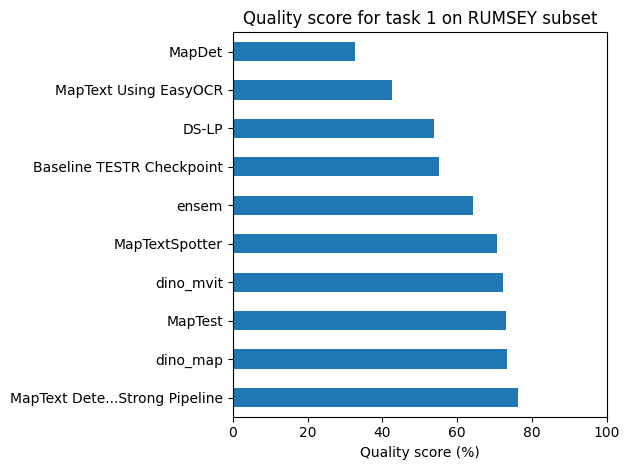

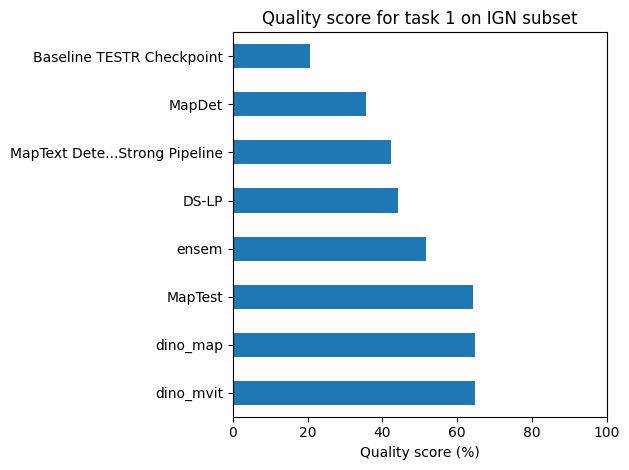

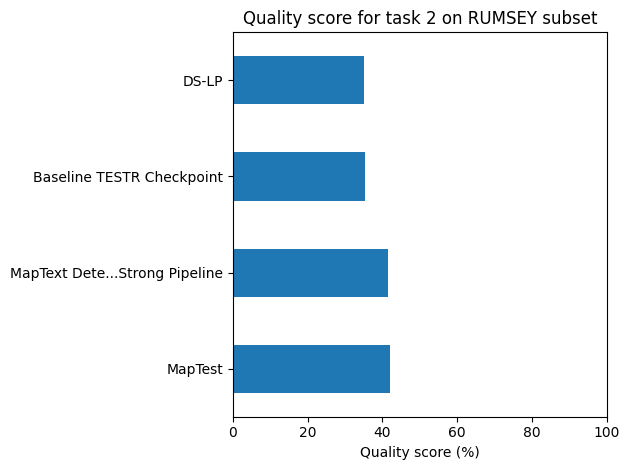

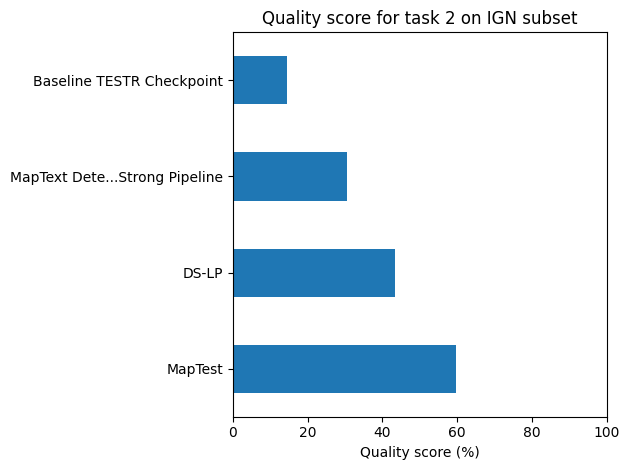

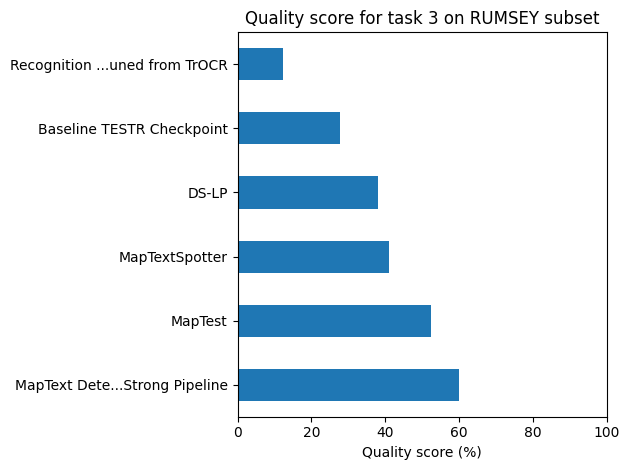

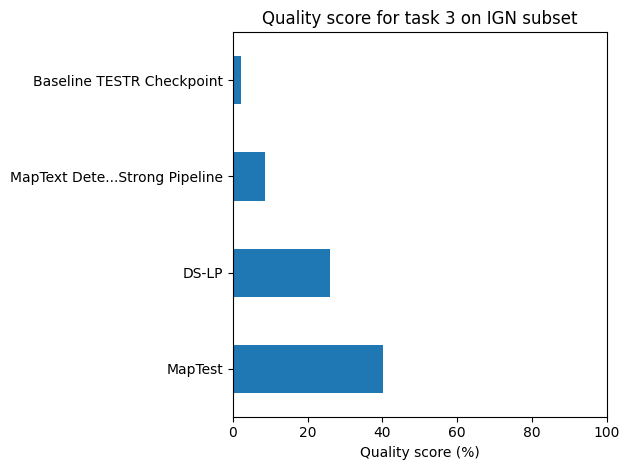

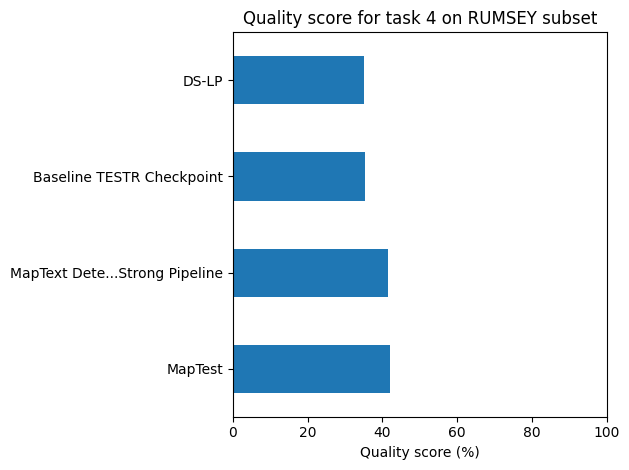

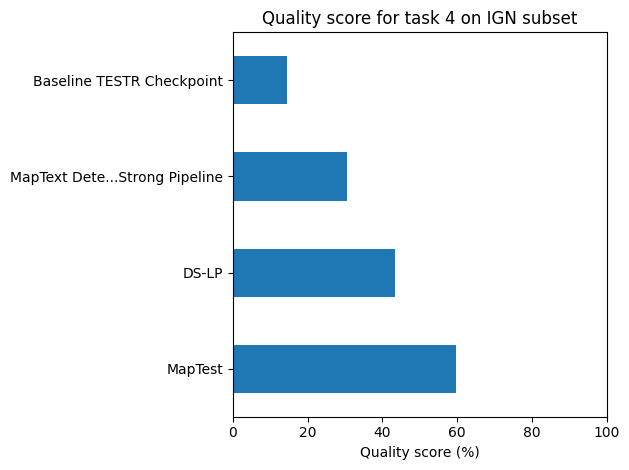

In [14]:
generate_all_tables_and_plot("data/01-tables-and-plots/")